<a href="https://colab.research.google.com/github/kavyagayathri/Data-Science/blob/main/Algerian_forest_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('/content/Algerian_forest_fires_cleaned_dataset.csv')

In [72]:
df.shape

(243, 15)

In [73]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [74]:
df.columns=df.columns.str.strip()

In [75]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [76]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [77]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
238,False
239,False
240,False
241,False


In [78]:
df.duplicated().sum()

np.int64(0)

In [79]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [80]:
df['FWI'].value_counts()

,count
FWI,
0.4,12
0.8,10
0.5,9
0.0,9
0.1,9
...,...
19.3,1
17.5,1
15.4,1


In [81]:
df = df.reset_index(drop=True)

In [82]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [83]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [84]:
df= df.drop(columns=['day','month','year','Region'],axis=1)

In [85]:
df.shape

(243, 11)

In [86]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

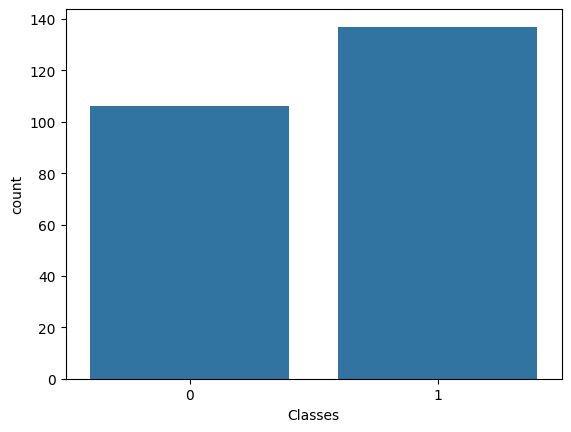

In [87]:
sns.countplot(x='Classes',data=df)
plt.show()

In [88]:
corr = df.select_dtypes(include=['int64','float64']).corr()
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216


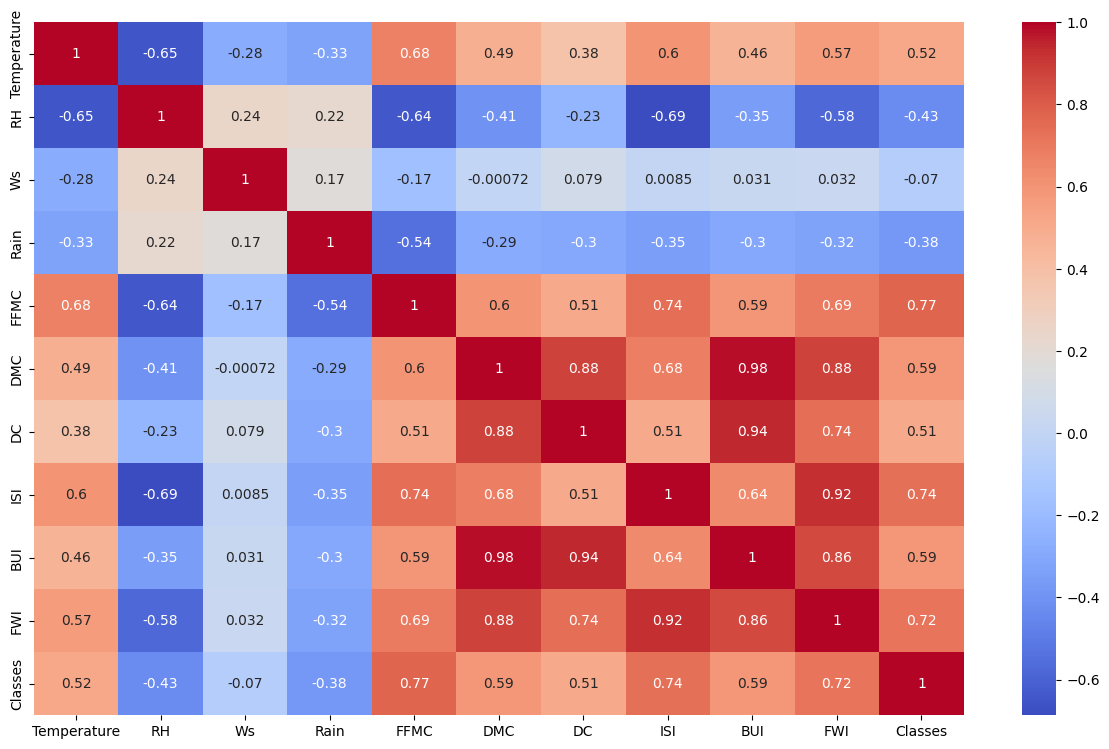

In [89]:
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [90]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [26]:
df = df.drop(columns=['BUI','DC'])

In [91]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [92]:
from sklearn.model_selection import train_test_split



In [96]:
X= df.drop(columns=[ 'BUI','DC'],axis=1)
y = df['Classes']

In [97]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,1.3,0.5,0
1,29,61,13,1.3,64.4,4.1,1.0,0.4,0
2,26,82,22,13.1,47.1,2.5,0.3,0.1,0
3,25,89,13,2.5,28.6,1.3,0.0,0.0,0
4,27,77,16,0.0,64.8,3.0,1.2,0.5,0


In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [102]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [103]:
model.fit(x_train,y_train)

LogisticRegression()

In [104]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [105]:
model.score(x_test, y_test)

1.0

In [106]:
predictions = model.predict(x_test)

In [107]:
predictions

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [108]:
comparision = pd.DataFrame({'Actual' : y_test, 'Predicted':predictions})

In [109]:
comparision

,Actual,Predicted
24,1,1
6,1,1
152,0,0
232,0,0
238,1,1
...,...,...
162,0,0
178,1,1
224,1,1
230,1,1


In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
accuracy=confusion_matrix(y_test,predictions)

In [112]:
accuracy

array([[24,  0],
       [ 0, 37]])

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
accuracy=accuracy_score(y_test,predictions)
accuracy

1.0

In [115]:
from sklearn.metrics import classification_report

In [116]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        37

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

